<a href="https://colab.research.google.com/github/Us9r/laskar-ai-capstone/blob/main/clustering/clustering_student_final_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **💻 Executive Summary 💼**

---

**Executive Summary: Analisis Karakteristik Siswa Melalui Clustering**

Analisis ini bertujuan untuk mengidentifikasi segmen-segmen siswa berdasarkan fitur-fitur akademik dan non-akademik terpilih, serta mengevaluasi kemampuan K-Means clustering dalam mereplikasi label `final_score` (ground truth) dan menemukan struktur alami data. Dataset terdiri dari 15 fitur utama yang meliputi nilai mata pelajaran, sikap, partisipasi ekstrakurikuler, dan latar belakang sosial ekonomi orang tua, dengan `final_score` sebagai variabel target biner (BAIK/CUKUP).

**1. Temuan Utama Tahap Eksplorasi Data (EDA):**
*   **Nilai Akademik:** Sebagian besar nilai mata pelajaran terkonsentrasi di atas 80. Namun, `n_agama` dan `n_bjawa` menunjukkan distribusi bimodal, mengindikasikan adanya dua kelompok siswa yang berbeda dalam performa mata pelajaran tersebut.
* **Nilai Akademik:** Sebagian besar nilai mata pelajaran terkonsentrasi di atas 80. Namun, `n_agama` dan `n_bjawa` menunjukkan distribusi bimodal, mengindikasikan adanya dua kelompok siswa yang berbeda dalam performa mata pelajaran tersebut.
* **Fitur Non-Akademik:** Mayoritas fitur demografi/sosial ekonomi memiliki distribusi yang sangat tidak seimbang. **Yang paling menonjol adalah `extracurricular_tidak`, di mana sekitar 88.3% siswa tidak mengikuti kegiatan ekstrakurikuler.**
* **Korelasi:**
 * Nilai mata pelajaran memiliki korelasi positif kuat satu sama lain dan juga dengan `final_score` (terutama `n_kejuruan` dengan 0.55).
 * `n_sikap_A` (0.43) juga berkorelasi kuat positif dengan `final_score`.
 * `extracurricular_tidak` memiliki korelasi negatif lemah (-0.15) dengan `final_score`, menunjukkan bahwa siswa yang *tidak* ikut ekstrakurikuler cenderung memiliki `final_score` yang lebih rendah.
 * Fitur demografi orang tua memiliki korelasi yang sangat lemah dengan `final_score`.
* **Variabel Target (`final_score`):** Terdapat ketidakseimbangan kelas yang signifikan, dengan sekitar 65.8% siswa berada dalam kategori "BAIK".

**2. Reduksi Dimensi dan Pemilihan Model:**
* **PCA, UMAP, dan t-SNE** digunakan untuk mereduksi 15 fitur menjadi 2 dimensi untuk visualisasi.
* **Visualisasi PCA** menunjukkan tumpang tindih yang signifikan antara kelas `final_score` 0 dan 1, mengindikasikan bahwa `final_score` tidak dapat dipisahkan secara linear di ruang komponen utama.
* **UMAP dan t-SNE** menunjukkan struktur klaster yang lebih jelas dan sedikit pemisahan `final_score` yang lebih baik, namun tetap ada *overlap* yang substansial.
* **Pilihan Model:** `X_scaled` digunakan untuk alur *clustering* yang menghormati *ground truth* (k=2) untuk mempertahankan informasi asli setelah normalisasi. **`X_pca` dipilih untuk alur *pure exploration clustering* (k=4) karena cenderung menghasilkan klaster berbentuk sferis yang lebih sesuai dengan asumsi K-Means**, meskipun tidak secara visual memisahkan *ground truth* sejelas t-SNE.

**3. Hasil Clustering Alur Pertama ("Respecting Ground-Truth")🎯:**
* **Model K-Means (k=2) pada `X_scaled`** diuji terhadap label `final_score`.
* **Metrik Evaluasi Eksternal (ARI: 0.0166, NMI: 0.2153, Homogeneity: 0.2037, Completeness: 0.2283, V-measure: 0.2153)** menunjukkan **kecocokan yang sangat rendah dengan `final_score`**. Ini berarti K-Means gagal secara efektif memisahkan siswa ke dalam klaster yang homogen dan lengkap sesuai dengan kategori `final_score`.
* **Karakteristik Klaster:** Meskipun kecocokan rendah, analisis fitur menunjukkan:
   * **Klaster 1:** Cenderung memiliki nilai akademik yang lebih tinggi di semua mata pelajaran, proporsi siswa dengan "sikap A" yang jauh lebih tinggi, dan lebih banyak partisipasi ekstrakurikuler. Ini mirip dengan profil siswa `final_score` "BAIK".
   * **Klaster 0:** Cenderung memiliki nilai akademik yang lebih rendah, tidak memiliki "sikap A", dan mayoritas tidak mengikuti ekstrakurikuler. Ini mirip dengan profil siswa `final_score` "CUKUP".
   * Meskipun ada perbedaan karakteristik, tumpang tindih yang melekat pada label `final_score` membuat K-Means sulit memisahkannya secara bersih.

**4. Hasil Clustering Alur Kedua ("Pure Clustering Exploration")🧭:**
* **Model K-Means (k=4) pada `X_pca`** berhasil mengidentifikasi empat klaster.
* **Silhouette Score sebesar 0.6964** menunjukkan **hasil *clustering* yang sangat baik**, dengan klaster-klaster yang sangat kohesif (padat secara internal) dan terpisah dengan baik (jauh dari klaster lain). Visualisasi PCA dengan label klaster juga mengkonfirmasi pemisahan yang jelas.
* **Karakteristik Klaster yang Teridentifikasi (4 Segmen Siswa):**
 * **Klaster 3 (Siswa Berprestasi Akademik Sangat Tinggi & Berkarakter Optimal):** Kelompok terkecil, dengan nilai akademik tertinggi di hampir semua mata pelajaran (terutama `n_agama`), **semua memiliki "sikap A"**, dan proporsi partisipasi ekstrakurikuler tertinggi. Menunjukkan bahwa prestasi tinggi dan sikap optimal dapat berasal dari berbagai latar belakang.
 * **Klaster 1 (Siswa Berprestasi Akademik Tinggi & Berkarakter A):** Mirip dengan Klaster 3, namun mungkin sedikit kurang ekstrem dalam nilai akademik dan lebih spesifik menonjol di `n_agama` dan `n_por`. **Semua siswa memiliki "sikap A"** dan memiliki partisipasi ekstrakurikuler yang lebih tinggi.
 * **Klaster 0 (Siswa Mayoritas Berprestasi Akademik Menengah & Non-Sikap A, Pasif):** Kelompok terbesar, dengan nilai akademik sedang, **tidak memiliki "sikap A"**, dan mayoritas tidak mengikuti ekstrakurikuler. Ini merepresentasikan sebagian besar populasi siswa.
 * **Klaster 2 (Siswa Berprestasi Akademik Rendah & Non-Sikap A, Pasif, Latar Belakang Pekerja):** Kelompok dengan nilai akademik terendah, **tidak memiliki "sikap A"**, mayoritas tidak mengikuti ekstrakurikuler, dan memiliki proporsi tertinggi orang tua dengan pendidikan SMP dan pekerjaan buruh. Kelompok ini kemungkinan paling membutuhkan dukungan.

**📜 Kesimpulan dan Rekomendasi 💡**
---

---


Meskipun K-Means tidak efektif dalam mereplikasi label `final_score` yang diberikan (kemungkinan karena tumpang tindih intrinsik dalam data), **alur eksplorasi murni dengan k=4 berhasil mengidentifikasi empat segmen siswa yang distinct dan bermakna secara statistik dan substantif.** Klaster-klaster ini memberikan *insight* berharga tentang kombinasi performa akademik, sikap, dan partisipasi ekstrakurikuler, serta beberapa indikator latar belakang sosial ekonomi.

Rekomendasi tindak lanjut dapat difokuskan pada:
1.  **Pengembangan Program Bertarget:** Membuat program dukungan khusus untuk Klaster 2 untuk meningkatkan performa akademik dan partisipasi.
2.  **Pengayaan:** Mengembangkan program pengayaan atau jalur percepatan untuk Klaster 1 dan 3, memanfaatkan "sikap A" dan motivasi mereka.
3.  **Meningkatkan Partisipasi Ekstrakurikuler:** Mendorong partisipasi ekstrakurikuler di Klaster 0 dan 2, mengingat korelasinya yang lemah namun signifikan dengan `final_score`.
4.  **Validasi Lanjut:** Melakukan validasi kualitatif dari klaster-klaster ini dengan ahli pendidikan untuk memastikan interpretasi ini relevan dan dapat ditindaklanjuti.

---

# **1. Import**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
import joblib

In [ ]:
sns.set_palette('summer') #set color palette

In [ ]:
df_encoded = pd.read_csv("https://raw.githubusercontent.com/Us9r/laskar-ai-capstone/main/resource/dataset/df_encoded.csv")

In [ ]:
df_encoded.head()

,absences,n_agama,n_pkn,n_bindo,n_mat,n_bing,n_por,n_bjawa,n_kejuruan,family_size,...,mother_salary_Cukup Tinggi,mother_salary_Rendah,mother_salary_Sangat Rendah,mother_salary_Tidak Berpenghasilan,mother_salary_Tinggi,scholarship_Tidak,scholarship_Ya,house_status_Menumpang,house_status_Rumah Sendiri,house_status_Sewa
0,1,94,84,87,85,82,89,89,87,7,...,0,0,0,1,0,1,0,0,1,0
1,1,83,82,87,82,79,84,88,86,4,...,0,0,0,0,0,1,0,0,0,1
2,0,94,83,87,90,84,87,87,88,5,...,0,0,0,1,0,1,0,1,0,0
3,3,94,83,88,85,81,89,89,88,4,...,0,0,0,1,0,0,1,0,1,0
4,5,91,82,87,84,80,85,89,87,5,...,0,0,0,0,0,1,0,0,0,1


# **2. Data Selection**
using top 15 feature selected at classification process before and final score (BAIK= 1 AND CUKUP = 0)

![](https://raw.githubusercontent.com/Us9r/laskar-ai-capstone/main/resource/img/top15feature.png)

In [ ]:
df_top15 = df_encoded[['n_kejuruan','n_mat','n_por', 'n_agama', 'n_bjawa', 'n_bindo', 'n_sikap_A',
                       'mother_work_Lainnya', 'mother_salary_Sangat Rendah','father_salary_Tidak Berpenghasilan',
                       'extracurricular_tidak', 'father_edu_SMP sederajat', 'father_work_Buruh', 'mother_salary_Cukup Rendah',
                       'mother_work_Buruh','final_score']] # with final_score as label

In [ ]:
df_top15.head()

,n_kejuruan,n_mat,n_por,n_agama,n_bjawa,n_bindo,n_sikap_A,mother_work_Lainnya,mother_salary_Sangat Rendah,father_salary_Tidak Berpenghasilan,extracurricular_tidak,father_edu_SMP sederajat,father_work_Buruh,mother_salary_Cukup Rendah,mother_work_Buruh,final_score
0,87,85,89,94,89,87,1,0,0,0,1,0,1,0,0,1
1,86,82,84,83,88,87,0,0,0,0,1,1,0,1,0,0
2,88,90,87,94,87,87,1,0,0,1,1,0,0,0,0,1
3,88,85,89,94,89,88,1,0,0,0,0,1,1,0,0,1
4,87,84,85,91,89,87,0,0,0,0,1,0,1,1,1,1


# **3. EDA**
simple EDA before clustering

In [ ]:
df_top15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   n_kejuruan                          856 non-null    int64
 1   n_mat                               856 non-null    int64
 2   n_por                               856 non-null    int64
 3   n_agama                             856 non-null    int64
 4   n_bjawa                             856 non-null    int64
 5   n_bindo                             856 non-null    int64
 6   n_sikap_A                           856 non-null    int64
 7   mother_work_Lainnya                 856 non-null    int64
 8   mother_salary_Sangat Rendah         856 non-null    int64
 9   father_salary_Tidak Berpenghasilan  856 non-null    int64
 10  extracurricular_tidak               856 non-null    int64
 11  father_edu_SMP sederajat            856 non-null    int64
 12  father_w

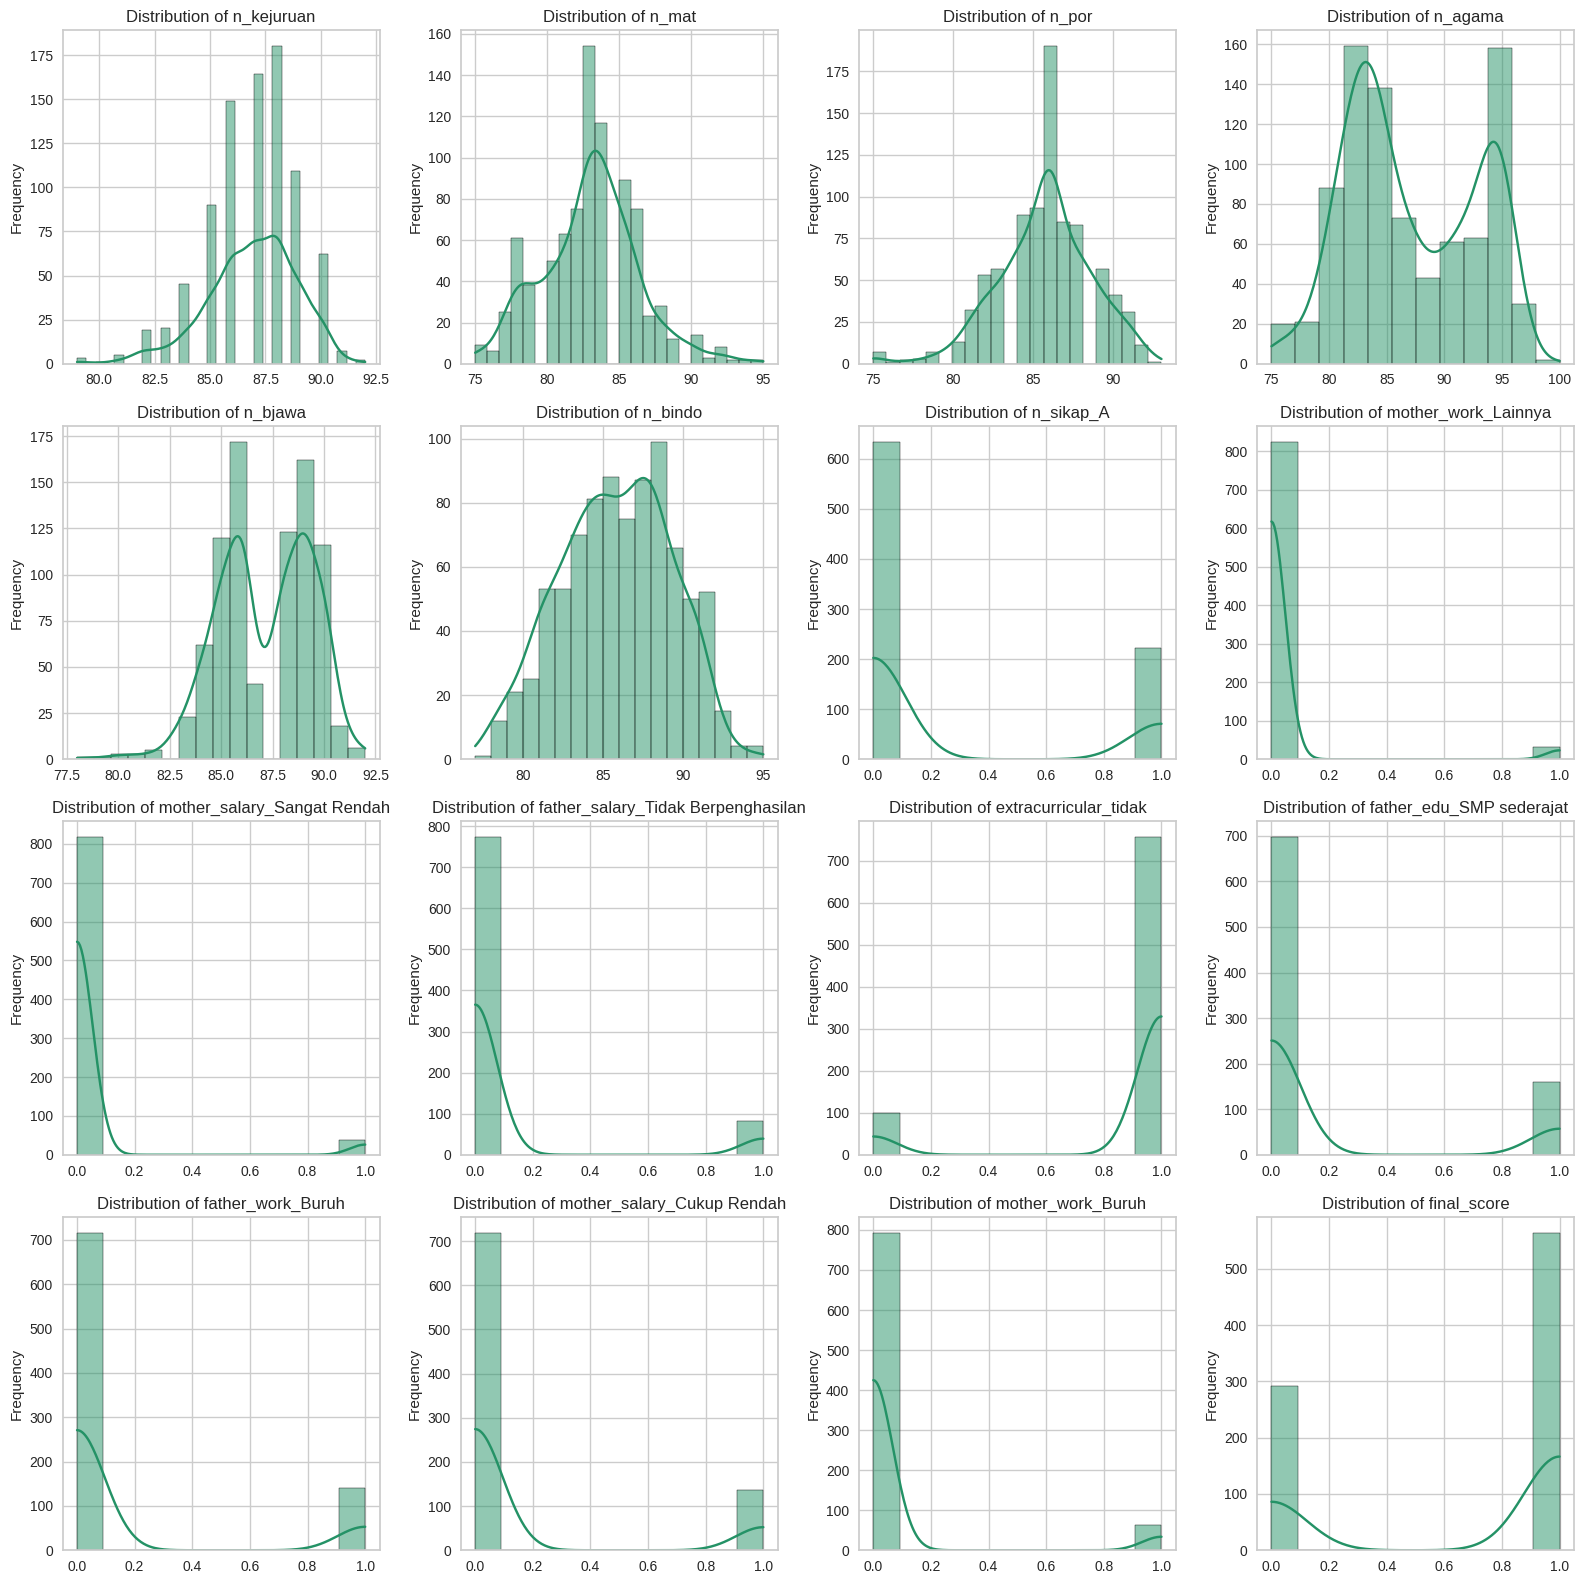

In [ ]:
n_cols = 4
n_rows = (len(df_top15.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(df_top15.columns):
    sns.histplot(data=df_top15, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


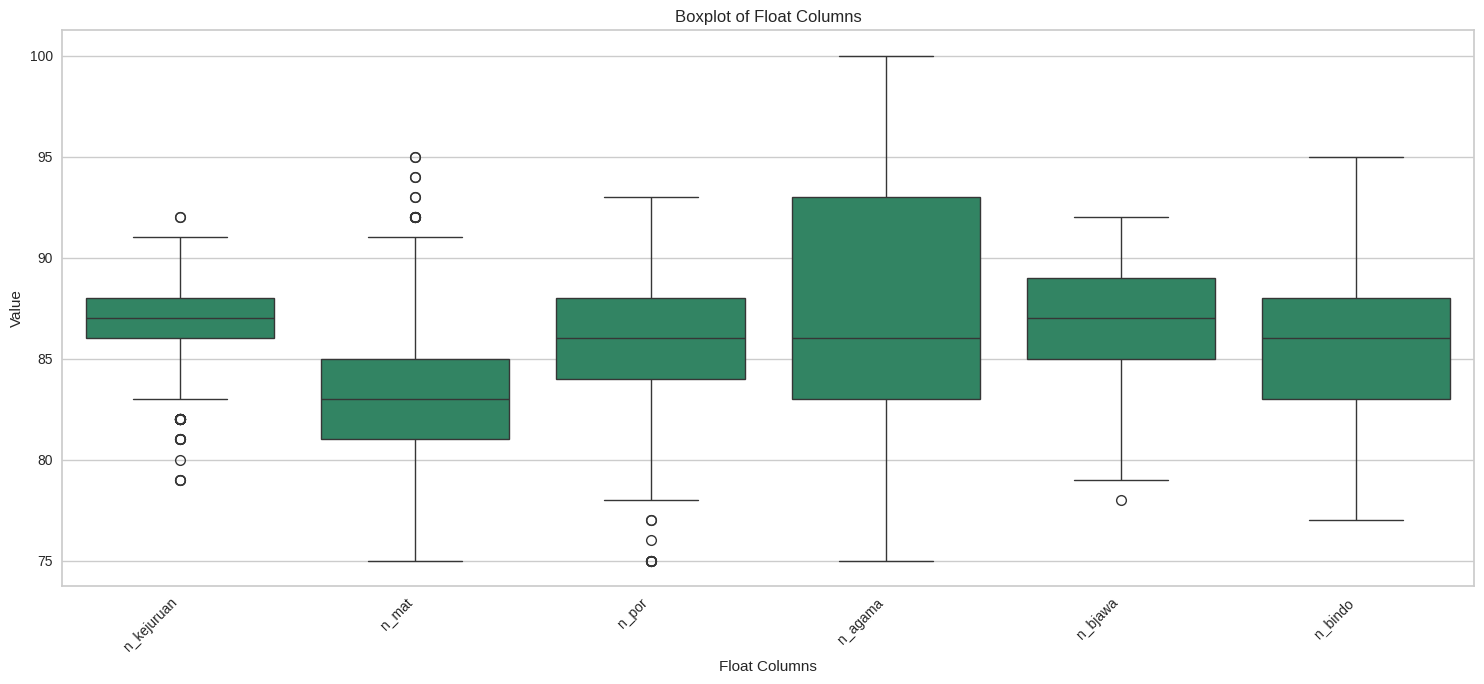

In [ ]:
# Reshape the DataFrame to long format for boxplot
numerical_cols = ['n_kejuruan','n_mat','n_por', 'n_agama', 'n_bjawa', 'n_bindo']
df_float_melted = df_top15[numerical_cols].melt(var_name='numerical_cols', value_name='nilai')

# Create boxplot
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_float_melted, x='numerical_cols', y='nilai')
plt.title('Boxplot of Float Columns')
plt.xlabel('Float Columns')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

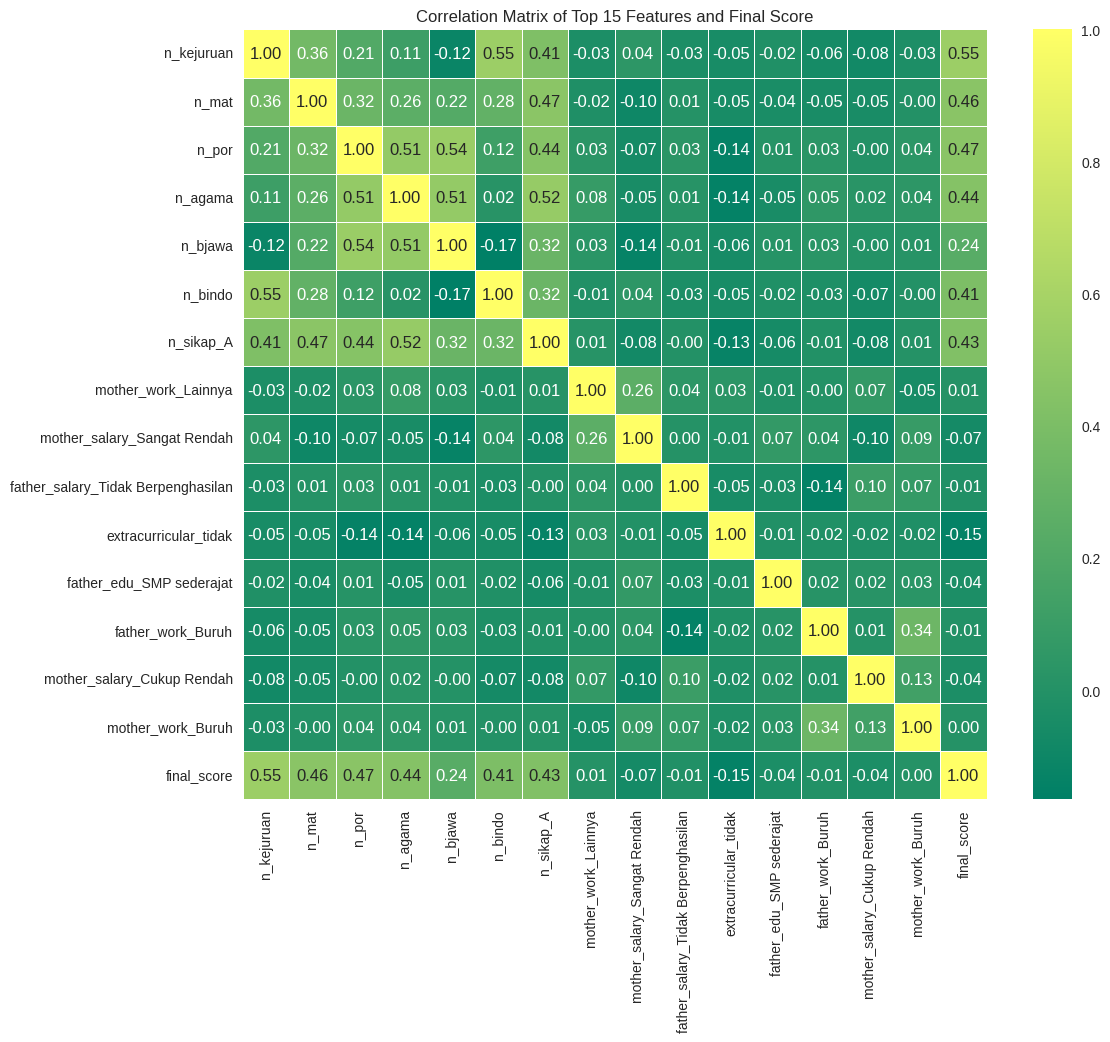

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_top15.corr(), annot=True, cmap='summer', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Top 15 Features and Final Score')
plt.show()

# **4. Data Preprocessing**

### 1). Rename inconsistent columns

In [ ]:
df_top15.columns

Index(['n_kejuruan', 'n_mat', 'n_por', 'n_agama', 'n_bjawa', 'n_bindo',
       'n_sikap_A', 'mother_work_Lainnya', 'mother_salary_Sangat Rendah',
       'father_salary_Tidak Berpenghasilan', 'extracurricular_tidak',
       'father_edu_SMP sederajat', 'father_work_Buruh',
       'mother_salary_Cukup Rendah', 'mother_work_Buruh', 'final_score'],
      dtype='object')

In [ ]:
new_columns = {col: col.replace(' ', '_').lower() for col in df_top15.columns}
df_top15.rename(columns=new_columns, inplace=True)
df_top15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   n_kejuruan                          856 non-null    int64
 1   n_mat                               856 non-null    int64
 2   n_por                               856 non-null    int64
 3   n_agama                             856 non-null    int64
 4   n_bjawa                             856 non-null    int64
 5   n_bindo                             856 non-null    int64
 6   n_sikap_a                           856 non-null    int64
 7   mother_work_lainnya                 856 non-null    int64
 8   mother_salary_sangat_rendah         856 non-null    int64
 9   father_salary_tidak_berpenghasilan  856 non-null    int64
 10  extracurricular_tidak               856 non-null    int64
 11  father_edu_smp_sederajat            856 non-null    int64
 12  father_w

<ipython-input-12-8f83477db8bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top15.rename(columns=new_columns, inplace=True)


### 2). Splitting X and y

In [ ]:
# prompt: pisah fitur target (final_score) ke y dan dataset tanpa fitur target ke X

X = df_top15.drop('final_score', axis=1)
y = df_top15['final_score']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (856, 15)
Shape of y: (856,)


### 3). Normalization Min Max Scaler

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a pandas DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

### 4). PCA

In [ ]:
# Apply PCA, reducing the dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Create a new DataFrame with the reduced dimensions
df_pca = pd.DataFrame(data = X_pca, columns = ['principal_component_1', 'principal_component_2'])

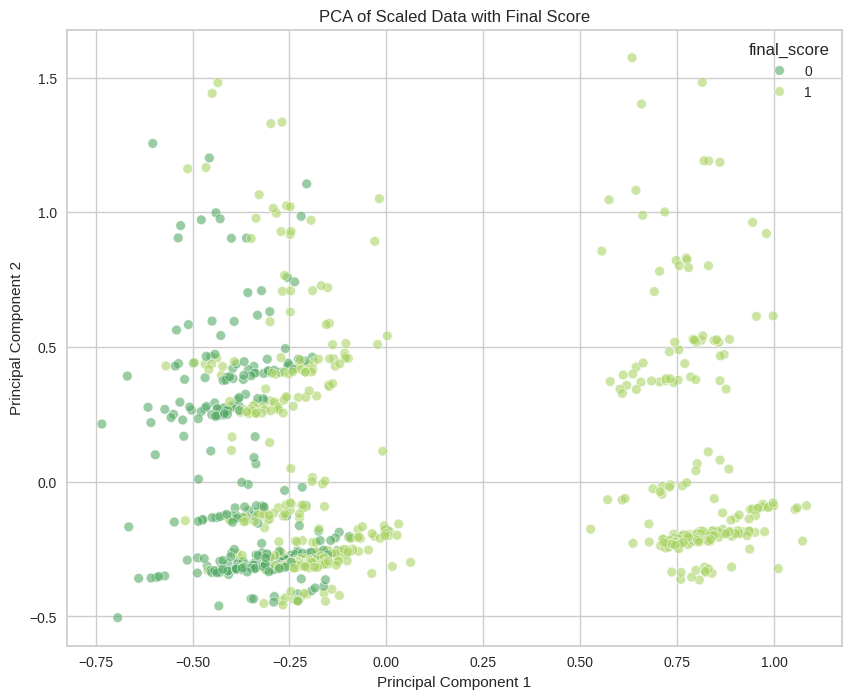

In [ ]:
# Combine the PCA results with the target variable
df_pca['final_score'] = y.reset_index(drop=True) # Use reset_index to align indices

# Visualize the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='final_score', data=df_pca, palette='summer', alpha=0.6)
plt.title('PCA of Scaled Data with Final Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### 5). UMAP

In [ ]:
umap_reducer = UMAP(random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
# Create a new DataFrame with the reduced dimensions
df_umap = pd.DataFrame(data = X_umap, columns = ['umap_component_1', 'umap_component_2'])

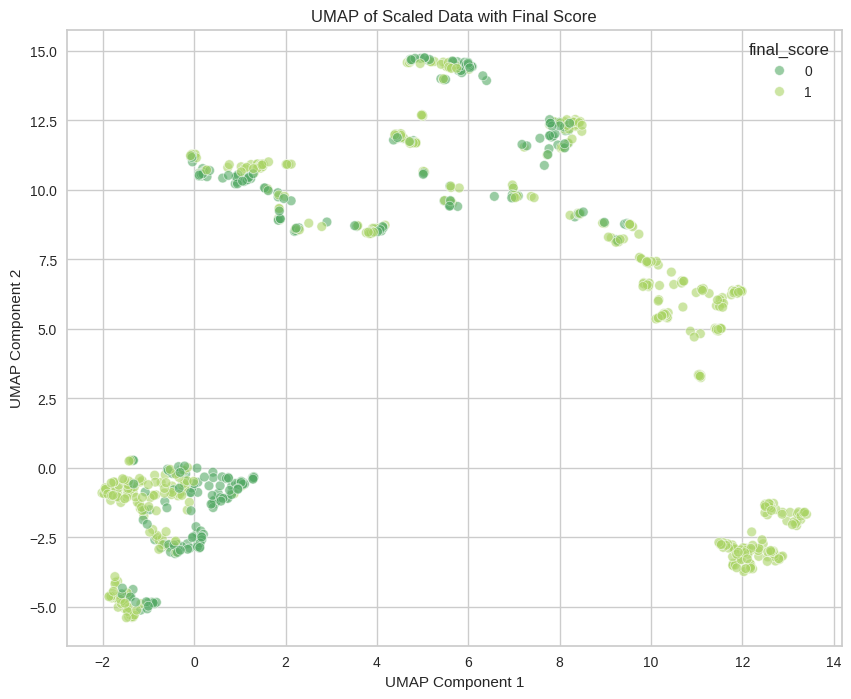

In [ ]:
# Combine the UMAP results with the target variable
df_umap['final_score'] = y.reset_index(drop=True) # Use reset_index to align indices

# Visualize the UMAP results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='umap_component_1', y='umap_component_2', hue='final_score', data=df_umap, palette='summer', alpha=0.6)
plt.title('UMAP of Scaled Data with Final Score')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.show()

### 6). t-SNE

In [ ]:
# Apply t-SNE, reducing the dimensions to 2
tsne = TSNE(n_components=2, perplexity=50, random_state=42) # random_state for reproducibility
X_tsne = tsne.fit_transform(X_scaled)

In [ ]:
# Create a new DataFrame with the reduced dimensions
df_tsne = pd.DataFrame(data = X_tsne, columns = ['tsne_component_1', 'tsne_component_2'])

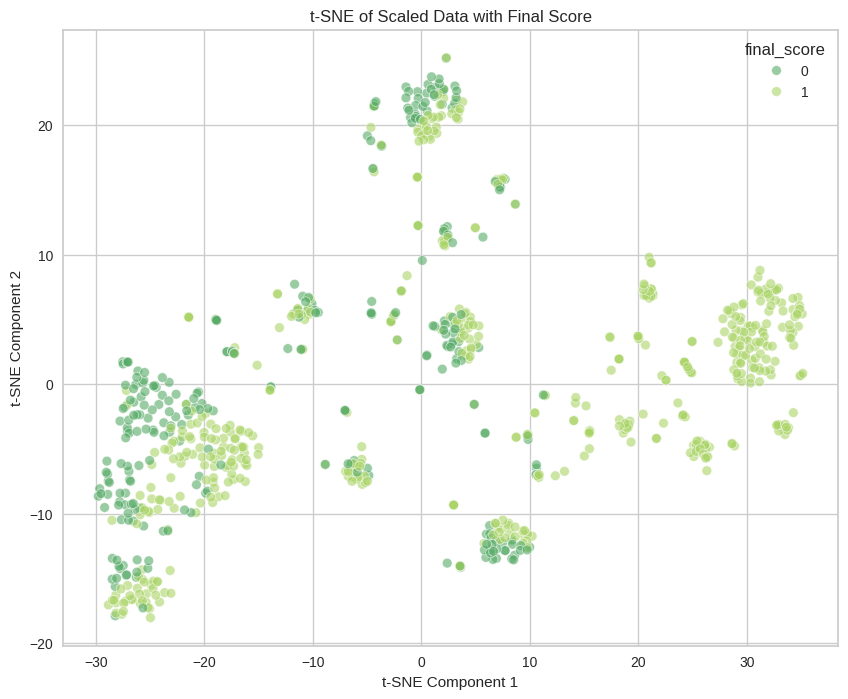

In [ ]:
# prompt: visulasisasi df_tsne

import matplotlib.pyplot as plt
# Combine the t-SNE results with the target variable
df_tsne['final_score'] = y.reset_index(drop=True) # Use reset_index to align indices

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_component_1', y='tsne_component_2', hue='final_score', data=df_tsne, palette='summer', alpha=0.6)
plt.title('t-SNE of Scaled Data with Final Score')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

# **5. Clustering**
Here, we have two different flows. The first flow is based on the labels because the optimal value of k as determined by the silhouette score is 2, which is the same as the groundtruth. The second flow is based on pure clustering exploration.

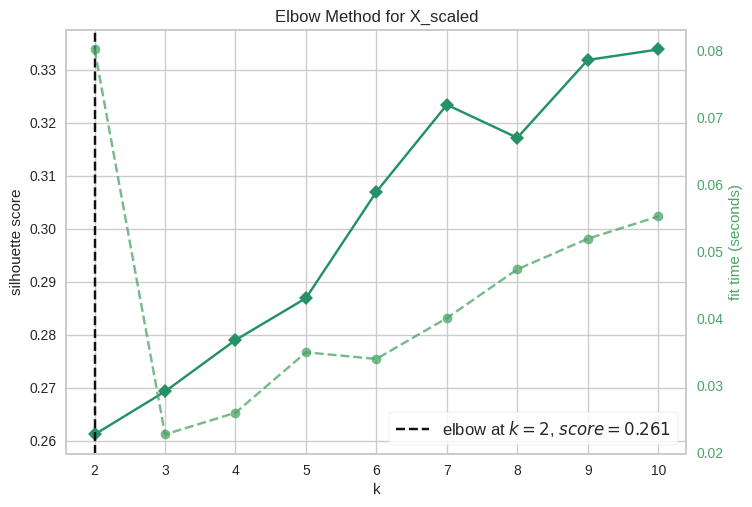

<Axes: title={'center': 'Elbow Method for X_scaled'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=42, init='k-means++' ,n_init=10)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', title='Elbow Method for X_scaled')
visualizer.fit(X_scaled)
visualizer.show()

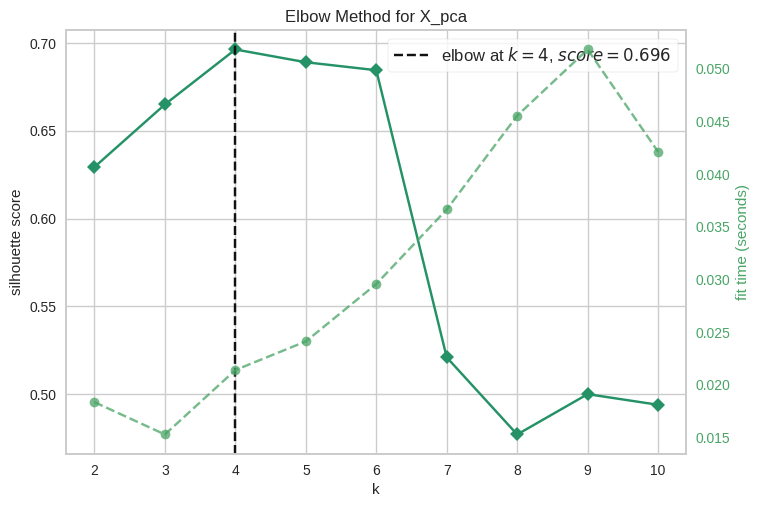

<Axes: title={'center': 'Elbow Method for X_pca'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', title='Elbow Method for X_pca')
visualizer.fit(X_pca)
visualizer.show()

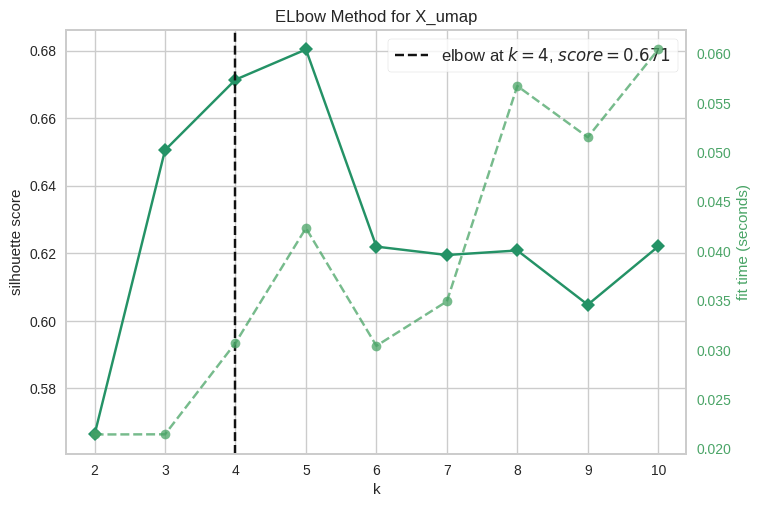

<Axes: title={'center': 'ELbow Method for X_umap'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', title='ELbow Method for X_umap')
visualizer.fit(X_umap)
visualizer.show()

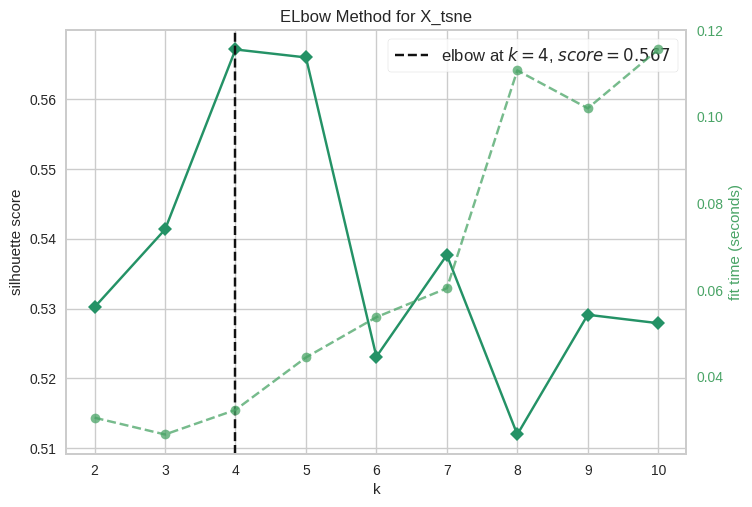

<Axes: title={'center': 'ELbow Method for X_tsne'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', title='ELbow Method for X_tsne')
visualizer.fit(X_tsne)
visualizer.show()

##**1). Respecting Ground-Truth**

In [ ]:
kmeans_scaled = KMeans(n_clusters=2, random_state=42, init='k-means++', n_init=10)
clusters_scaled = kmeans_scaled.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe (or the scaled dataframe for visualization)
X_scaled_df['cluster'] = clusters_scaled

# You can then visualize or analyze the clusters
print("Cluster distribution for X_scaled with k=2:")
print(X_scaled_df['cluster'].value_counts())

Cluster distribution for X_scaled with k=2:
cluster
0    634
1    222
Name: count, dtype: int64


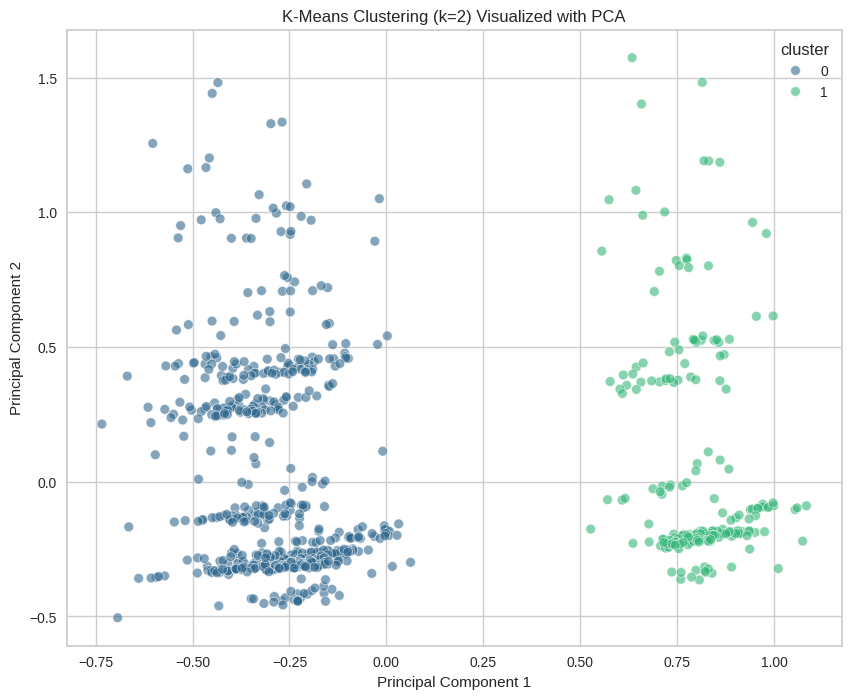

In [ ]:
df_pca_gt = df_pca.copy()
df_pca_gt['cluster'] = clusters_scaled

# Visualize the clustering results using PCA reduced dimensions
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=df_pca_gt, palette='viridis', alpha=0.6)
plt.title('K-Means Clustering (k=2) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
# Label hasil clustering dari X_scaled_df
cluster_labels = X_scaled_df['cluster']

# Label awal (ground truth)
ground_truth_labels = y

# Hitung metrik evaluasi
ari = adjusted_rand_score(ground_truth_labels, cluster_labels)
nmi = normalized_mutual_info_score(ground_truth_labels, cluster_labels)
homogeneity = homogeneity_score(ground_truth_labels, cluster_labels)
completeness = completeness_score(ground_truth_labels, cluster_labels)
v_measure = v_measure_score(ground_truth_labels, cluster_labels)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"Homogeneity: {homogeneity:.4f}")
print(f"Completeness: {completeness:.4f}")
print(f"V-measure: {v_measure:.4f}")

Adjusted Rand Index (ARI): 0.0166
Normalized Mutual Information (NMI): 0.2153
Homogeneity: 0.2037
Completeness: 0.2283
V-measure: 0.2153


#### Silhouette Score gt (Ground-Truth)

In [ ]:
silhouette_avg_scaled = silhouette_score(X_scaled, clusters_scaled)

print(f"Silhouette Score for X_scaled with k=2: {silhouette_avg_scaled:.4f}")

Silhouette Score for X_scaled with k=2: 0.2612


##**2). Pure Clustering Exploration**

In [ ]:
kmeans_pca = KMeans(n_clusters=4, random_state=42, init='k-means++', n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Menambahkan label cluster ke DataFrame PCA
df_pca_exp = df_pca.copy()
df_pca_exp['cluster'] = clusters_pca

# You can then visualize or analyze the clusters
print("Cluster distribution for X_pca with k=4:")
print(df_pca_exp['cluster'].value_counts())

Cluster distribution for X_pca with k=4:
cluster
0    421
2    213
1    162
3     60
Name: count, dtype: int64


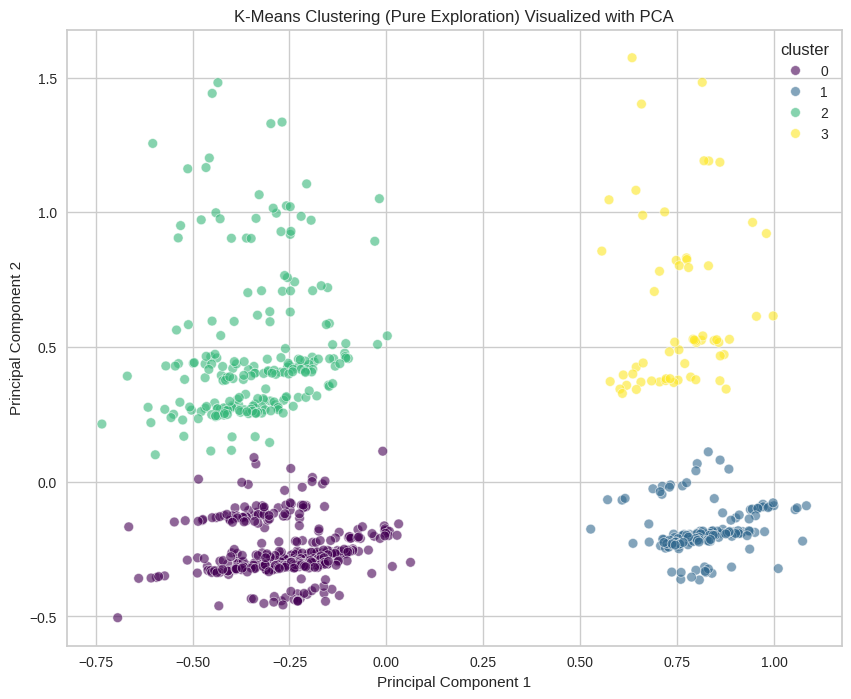

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=df_pca_exp, palette='viridis', alpha=0.6)
plt.title('K-Means Clustering (Pure Exploration) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

#### Silhouette Score exp (Exploration)

In [ ]:
silhouette_avg_pca = silhouette_score(X_pca, clusters_pca)
print(f"Silhouette Score for X_pca with k=4: {silhouette_avg_pca:.4f}")

Silhouette Score for X_pca with k=4: 0.6964


## 3). Assign the cluster label to original dataframe

In [ ]:
df_top15_clustered = df_top15.copy()
df_top15_clustered['cluster_gt'] = clusters_scaled
df_top15_clustered['cluster_exp'] = clusters_pca

In [ ]:
df_top15.head()

,n_kejuruan,n_mat,n_por,n_agama,n_bjawa,n_bindo,n_sikap_a,mother_work_lainnya,mother_salary_sangat_rendah,father_salary_tidak_berpenghasilan,extracurricular_tidak,father_edu_smp_sederajat,father_work_buruh,mother_salary_cukup_rendah,mother_work_buruh,final_score
0,87,85,89,94,89,87,1,0,0,0,1,0,1,0,0,1
1,86,82,84,83,88,87,0,0,0,0,1,1,0,1,0,0
2,88,90,87,94,87,87,1,0,0,1,1,0,0,0,0,1
3,88,85,89,94,89,88,1,0,0,0,0,1,1,0,0,1
4,87,84,85,91,89,87,0,0,0,0,1,0,1,1,1,1


# **6. Visualization**

## **1). gt visualization**

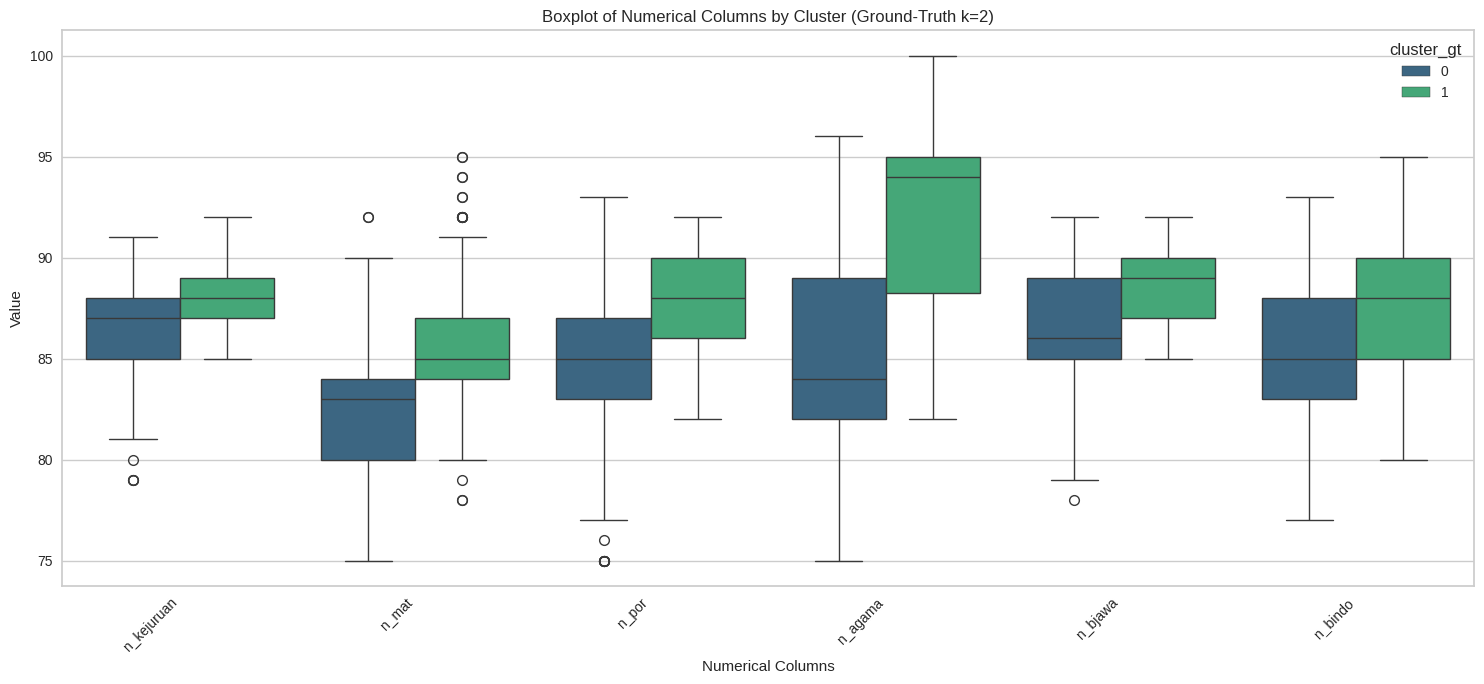

In [ ]:
df_melted_gt = df_top15_clustered[numerical_cols + ['cluster_gt']].melt(id_vars='cluster_gt', var_name='numerical_cols', value_name='nilai')

plt.figure(figsize=(15, 7))
sns.boxplot(data=df_melted_gt, x='numerical_cols', y='nilai', hue='cluster_gt', palette='viridis')
plt.title('Boxplot of Numerical Columns by Cluster (Ground-Truth k=2)')
plt.xlabel('Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

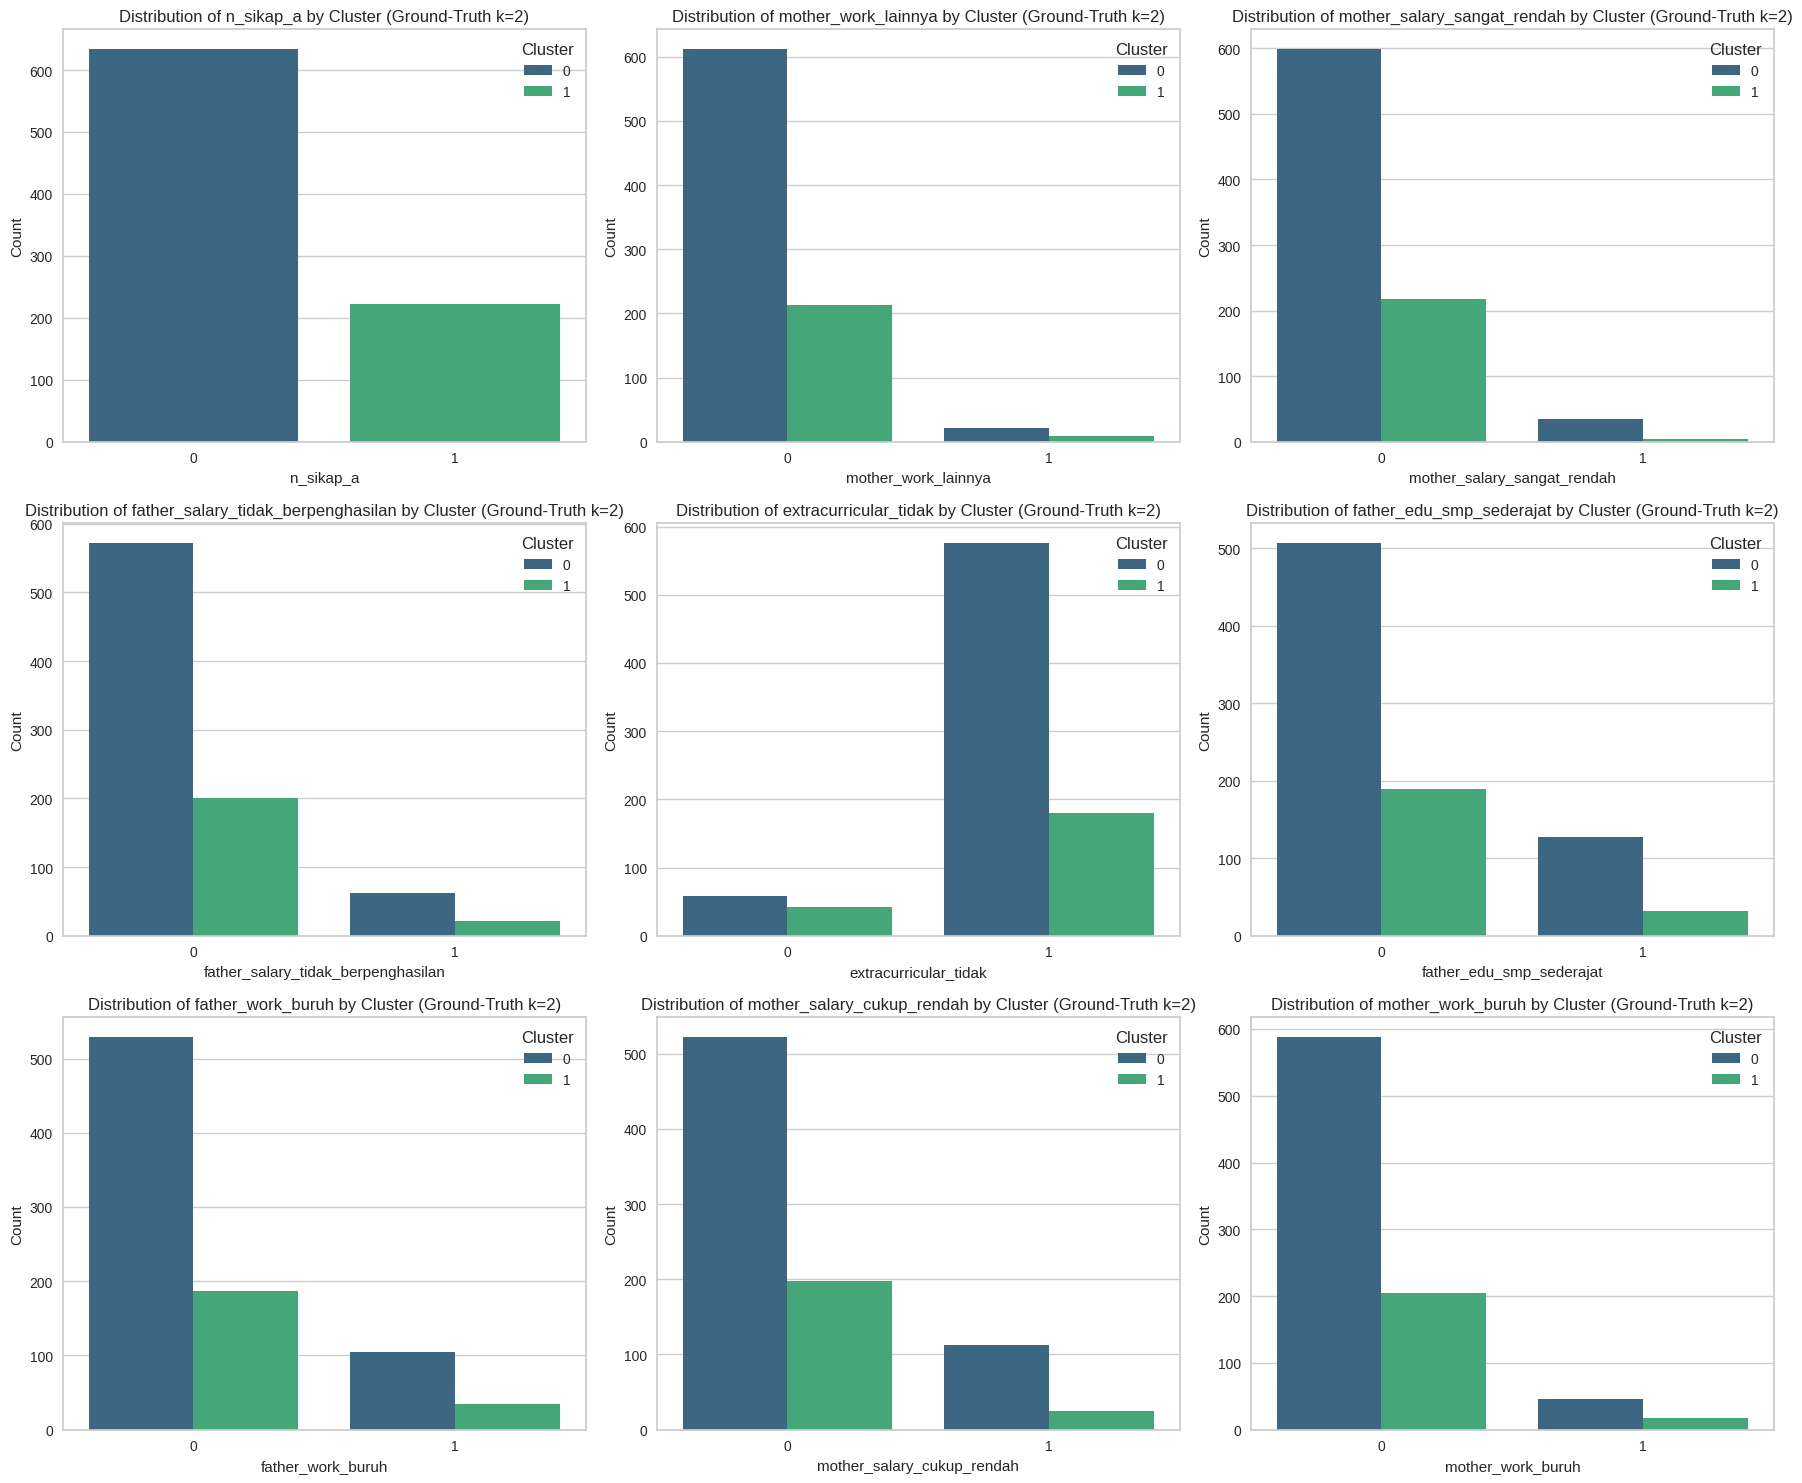

In [ ]:
categorical_cols = ['n_sikap_a', 'mother_work_lainnya', 'mother_salary_sangat_rendah',
                    'father_salary_tidak_berpenghasilan', 'extracurricular_tidak',
                    'father_edu_smp_sederajat', 'father_work_buruh',
                    'mother_salary_cukup_rendah', 'mother_work_buruh']

# Jumlah kolom per baris untuk subplot
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_top15_clustered, x=col, hue='cluster_gt', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Cluster (Ground-Truth k=2)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Cluster')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

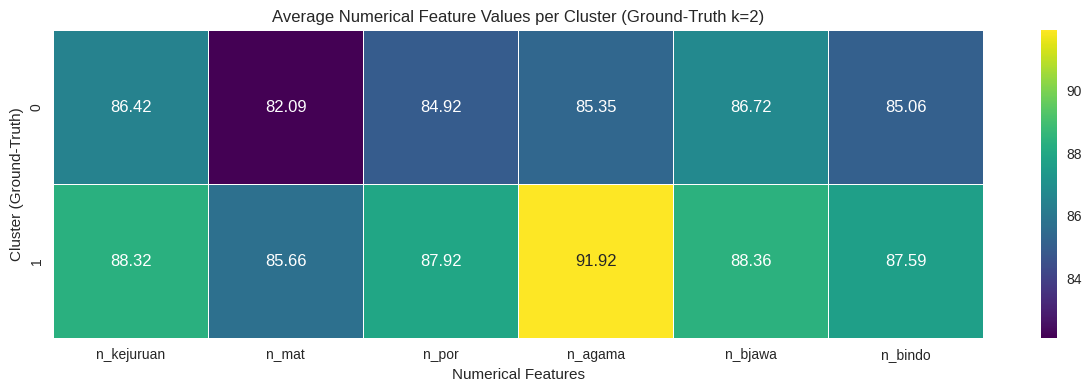

In [ ]:
# Calculate average numerical feature values per cluster (Exploration)
cluster_gt_means_numerical = df_top15_clustered.groupby('cluster_gt')[numerical_cols].mean()

# Visualize average numerical feature values per cluster (Ground-Truth k=2)
plt.figure(figsize=(15, 4))
sns.heatmap(cluster_gt_means_numerical, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Average Numerical Feature Values per Cluster (Ground-Truth k=2)')
plt.xlabel('Numerical Features')
plt.ylabel('Cluster (Ground-Truth)')
plt.show()

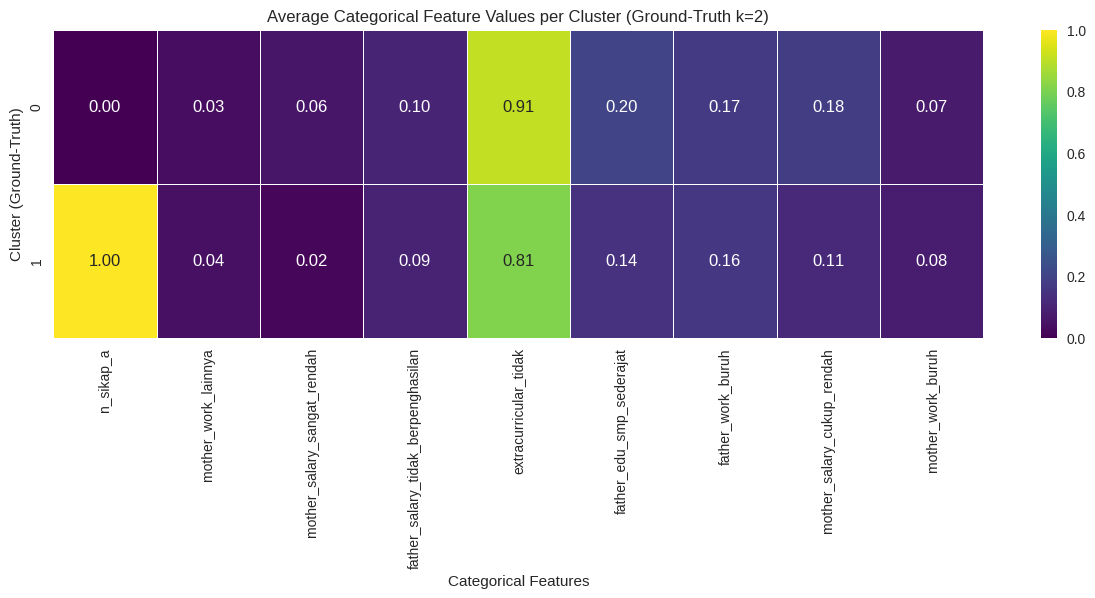

In [ ]:
cluster_gt_means_categorical = df_top15_clustered.groupby('cluster_gt')[categorical_cols].mean()

# Visualize average categorical feature values per cluster (Ground-Truth k=2)
plt.figure(figsize=(15, 4))
sns.heatmap(cluster_gt_means_categorical, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Average Categorical Feature Values per Cluster (Ground-Truth k=2)')
plt.xlabel('Categorical Features')
plt.ylabel('Cluster (Ground-Truth)')
plt.show()

### **Interpretasi Klaster (Alur "Respecting Ground-Truth" k=2):**
---

Berdasarkan analisis visualisasi boxplot dan heatmap nilai rata-rata fitur numerik dan kategorikal, K-Means dengan `k=2` pada data `X_scaled` telah mengelompokkan siswa ke dalam dua klaster yang memiliki karakteristik yang cukup berbeda, meskipun evaluasi metrik eksternal menunjukkan kecocokan yang rendah dengan label `final_score` yang sebenarnya.

**Klaster 0: "Siswa Berprestasi Akademik Menengah, Non-Sikap A, dan Kurang Aktif Ekstrakurikuler"**

* **Ukuran:** Ini adalah klaster yang lebih besar, menampung mayoritas siswa.
* **Nilai Akademik:** Siswa dalam klaster ini cenderung memiliki **nilai rata-rata yang lebih rendah di semua mata pelajaran** dibandingkan dengan Klaster 1. Perbedaan ini konsisten di seluruh mata pelajaran seperti `n_kejuruan` (rata-rata 86.42), `n_mat` (82.09), `n_por` (84.92), `n_agama` (85.35), `n_bjawa` (86.72), dan `n_bindo` (85.06). Meskipun demikian, nilai-nilai ini masih tergolong baik (di atas 80), menunjukkan performa "menengah".
* **Sikap (`n_sikap_A`):** Fitur paling membedakan adalah **tidak adanya siswa dengan "sikap A"** (rata-rata 0.00). Ini menunjukkan kelompok yang mayoritas memiliki sikap B, C, atau D.
* **Partisipasi Ekstrakurikuler:** Sebagian besar siswa di klaster ini **tidak mengikuti kegiatan ekstrakurikuler** (rata-rata `extracurricular_tidak` sangat tinggi, yaitu 0.91), mencerminkan sifat pasif dalam kegiatan non-akademik.
* **Latar Belakang Sosial Ekonomi:** Klaster ini merepresentasikan mayoritas siswa, dengan proporsi yang rendah untuk kategori minoritas pekerjaan/gaji orang tua yang di-*encode* sebagai '1'. Ini menunjukkan bahwa latar belakang sosial ekonomi mereka cenderung lebih "umum" atau "rata-rata" dalam dataset ini.

**Secara Ringkas:** Klaster 0 dapat digambarkan sebagai kelompok siswa yang berkinerja akademik pada tingkat menengah, namun kurang menunjukkan sikap positif yang teridentifikasi ("sikap A") dan cenderung tidak terlibat dalam kegiatan ekstrakurikuler.

---

**Klaster 1: "Siswa Berprestasi Akademik Tinggi, Berkarakter A, dan Lebih Aktif Ekstrakurikuler"**

* **Ukuran:** Ini adalah klaster yang lebih kecil.
* **Nilai Akademik:** Siswa dalam klaster ini secara konsisten menunjukkan **nilai rata-rata yang lebih tinggi di semua mata pelajaran** dibandingkan Klaster 0. Contohnya, `n_kejuruan` (88.32), `n_mat` (85.66), `n_por` (87.92), `n_agama` (**91.92**), `n_bjawa` (88.36), dan `n_bindo` (87.59). Peningkatan nilai ini signifikan, terutama pada `n_agama`.
* **Sikap (`n_sikap_A`):** Pembeda yang sangat kuat adalah fakta bahwa **semua siswa di klaster ini memiliki "sikap A"** (rata-rata 1.00). Ini menunjukkan kelompok siswa yang sangat positif dan termotivasi.
* **Partisipasi Ekstrakurikuler:** Meskipun masih ada mayoritas yang tidak ikut ekstrakurikuler, Klaster 1 memiliki **proporsi siswa yang sedikit lebih tinggi yang mengikuti kegiatan ekstrakurikuler** (rata-rata `extracurricular_tidak` 0.81) dibandingkan Klaster 0.
* **Latar Belakang Sosial Ekonomi:** Mirip dengan Klaster 0, fitur-fitur demografi orang tua tidak menunjukkan perbedaan yang dominan, meskipun ada sedikit variasi pada proporsi kategori minoritas.

**Secara Ringkas:** Klaster 1 merepresentasikan kelompok siswa berkinerja akademik yang tinggi dan sangat baik, yang secara unik dicirikan oleh kepemilikan "sikap A" dan kecenderungan yang lebih besar untuk berpartisipasi dalam kegiatan ekstrakurikuler. Klaster ini sangat cocok dengan profil siswa yang ideal atau berpotensi mencapai `final_score` "BAIK".

---

Meskipun K-Means tidak sepenuhnya selaras dengan label `final_score` yang sudah ada, analisis karakteristik ini memberikan gambaran yang jelas tentang dua kelompok siswa yang berbeda secara signifikan dalam aspek akademik, sikap, dan partisipasi. Hal ini menggarisbawahi bahwa bahkan dengan ketidaksesuaian metrik eksternal, klaster yang terbentuk tetap memiliki interpretasi yang bermakna.

## **2). exp visualization**

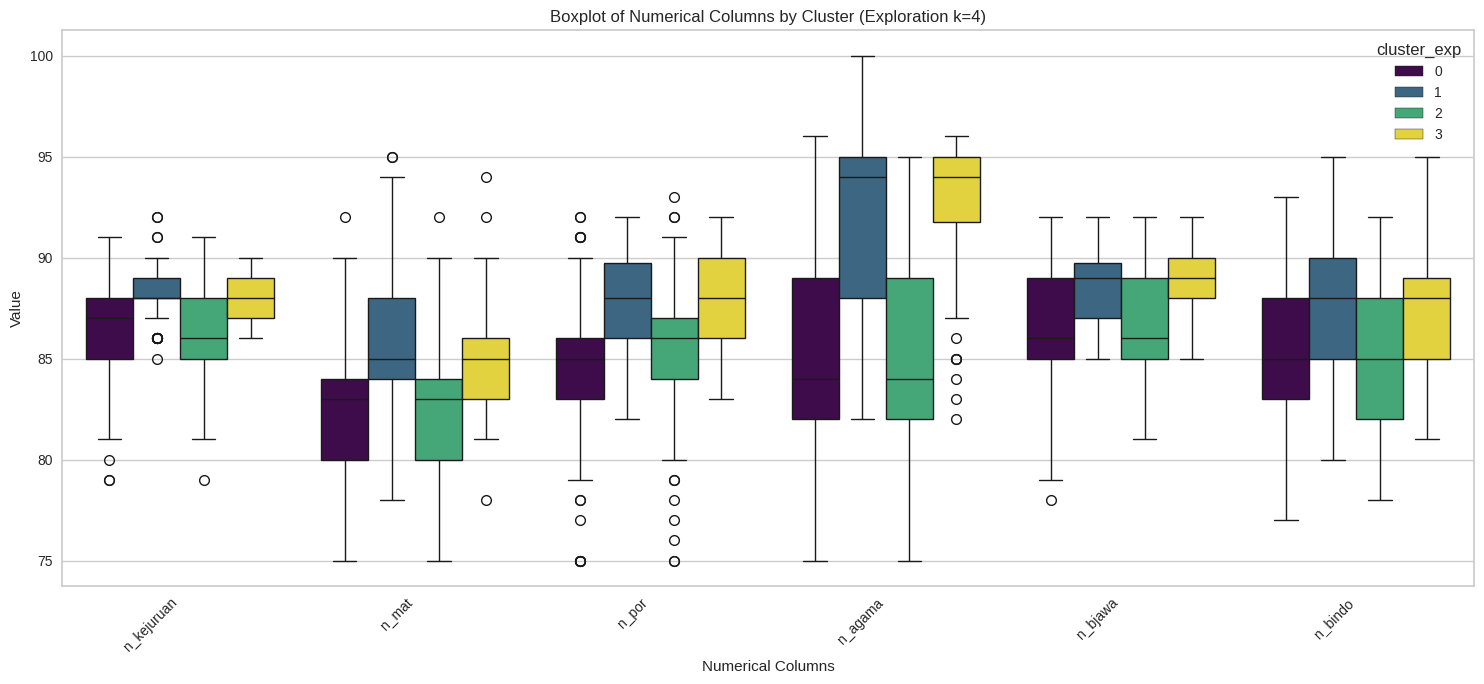

In [ ]:
df_melted_exp = df_top15_clustered[numerical_cols + ['cluster_exp']].melt(id_vars='cluster_exp', var_name='numerical_cols', value_name='nilai')
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_melted_exp, x='numerical_cols', y='nilai', hue='cluster_exp', palette='viridis')
plt.title('Boxplot of Numerical Columns by Cluster (Exploration k=4)')
plt.xlabel('Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

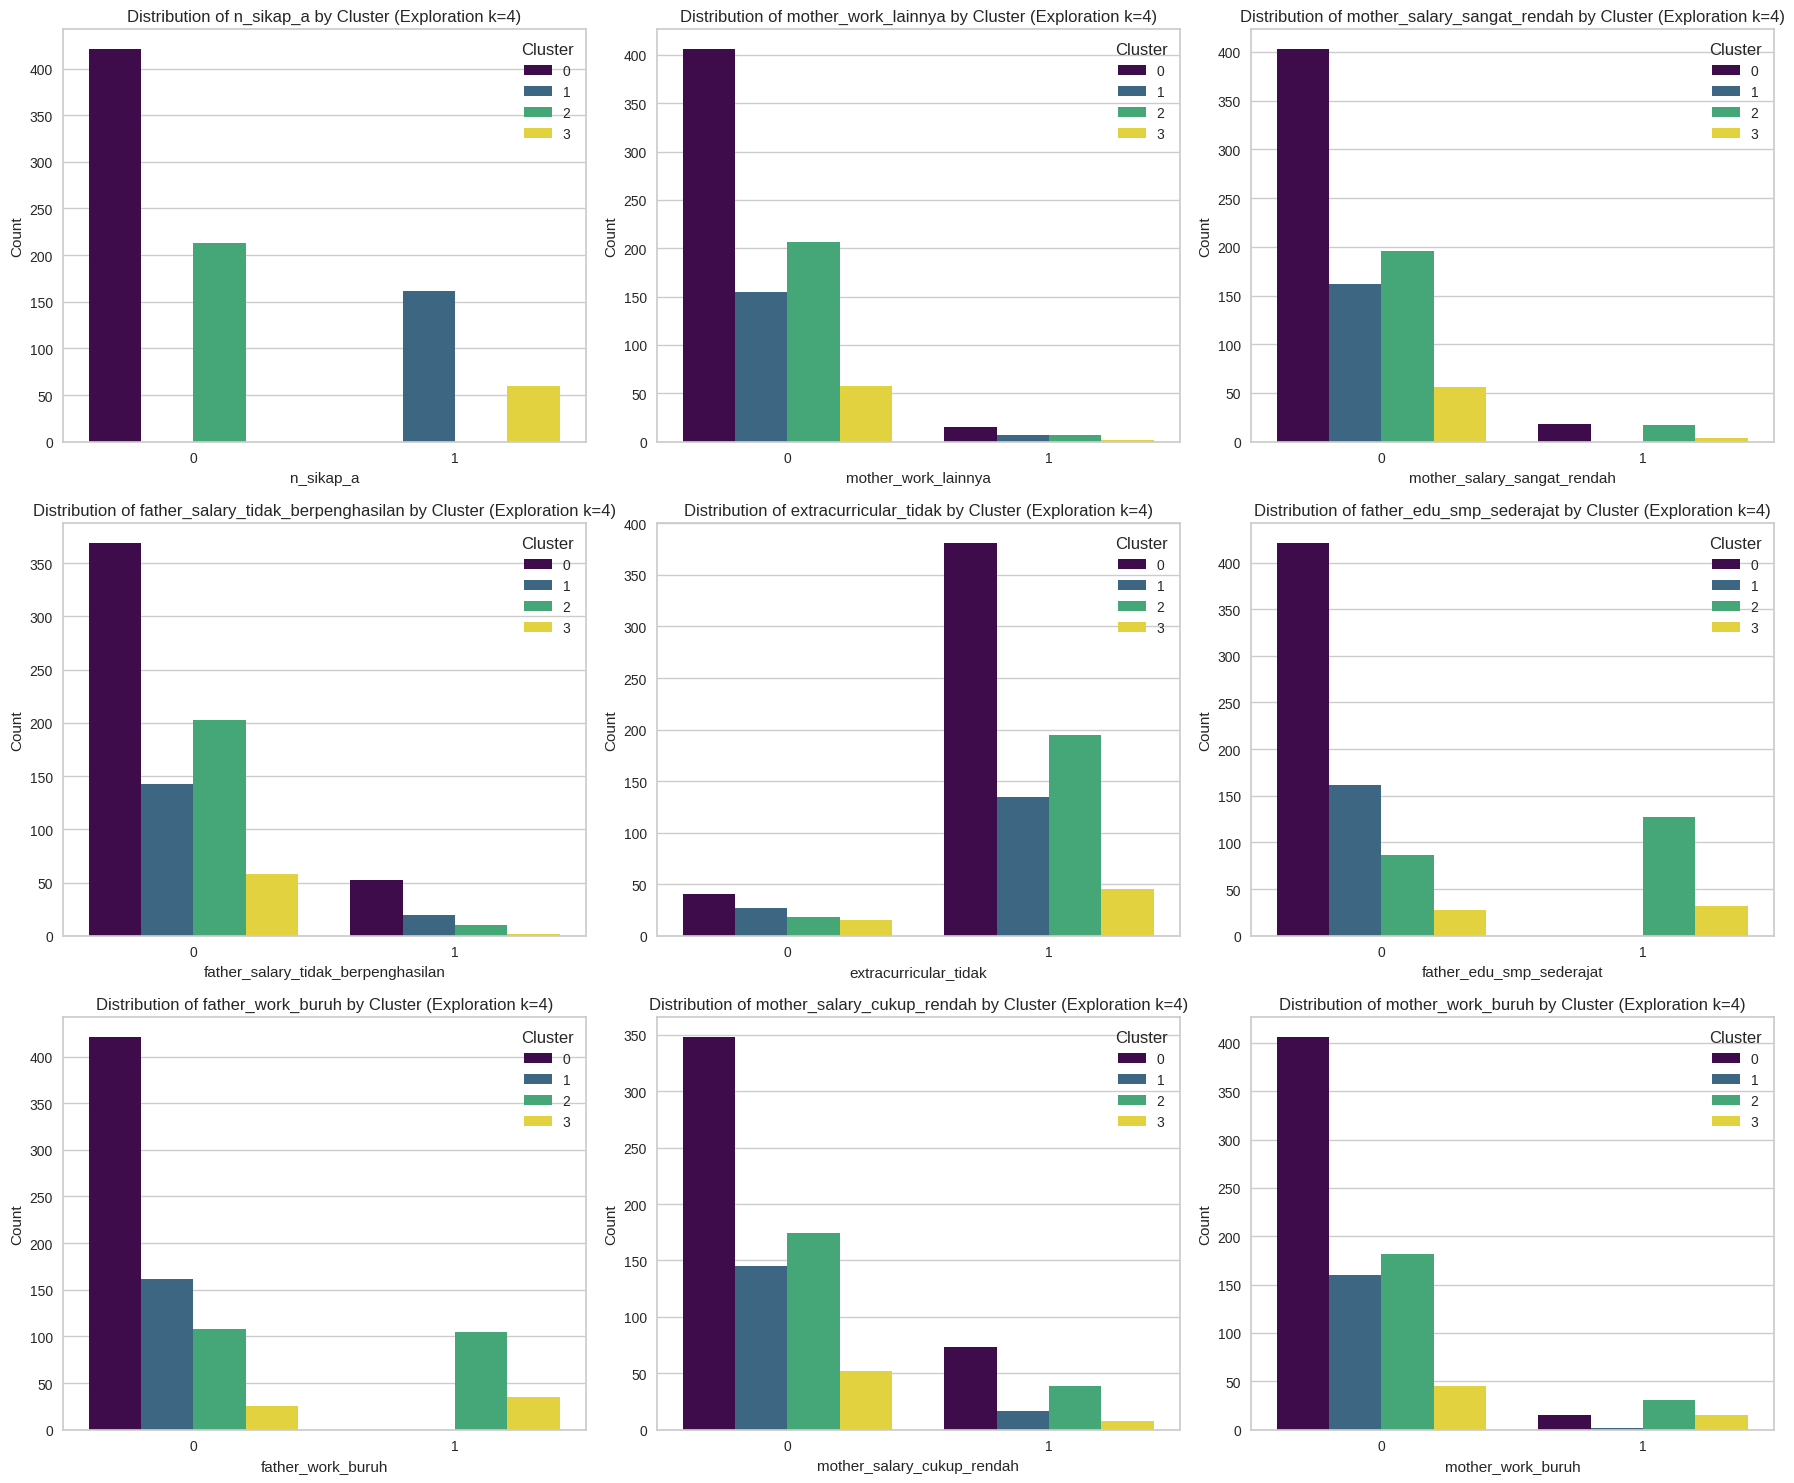

In [ ]:
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_top15_clustered, x=col, hue='cluster_exp', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Cluster (Exploration k=4)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Cluster')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


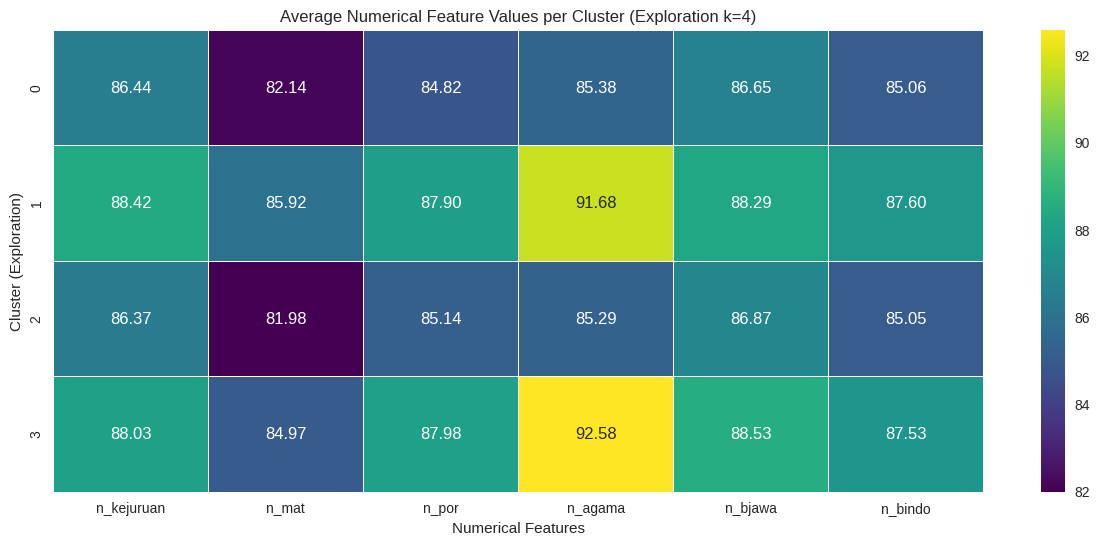

In [ ]:
# Calculate average numerical feature values per cluster (Exploration)
cluster_exp_means_numerical = df_top15_clustered.groupby('cluster_exp')[numerical_cols].mean()

# Visualize average numerical feature values per cluster (Exploration k=4)
plt.figure(figsize=(15, 6))
sns.heatmap(cluster_exp_means_numerical, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Average Numerical Feature Values per Cluster (Exploration k=4)')
plt.xlabel('Numerical Features')
plt.ylabel('Cluster (Exploration)')
plt.show()

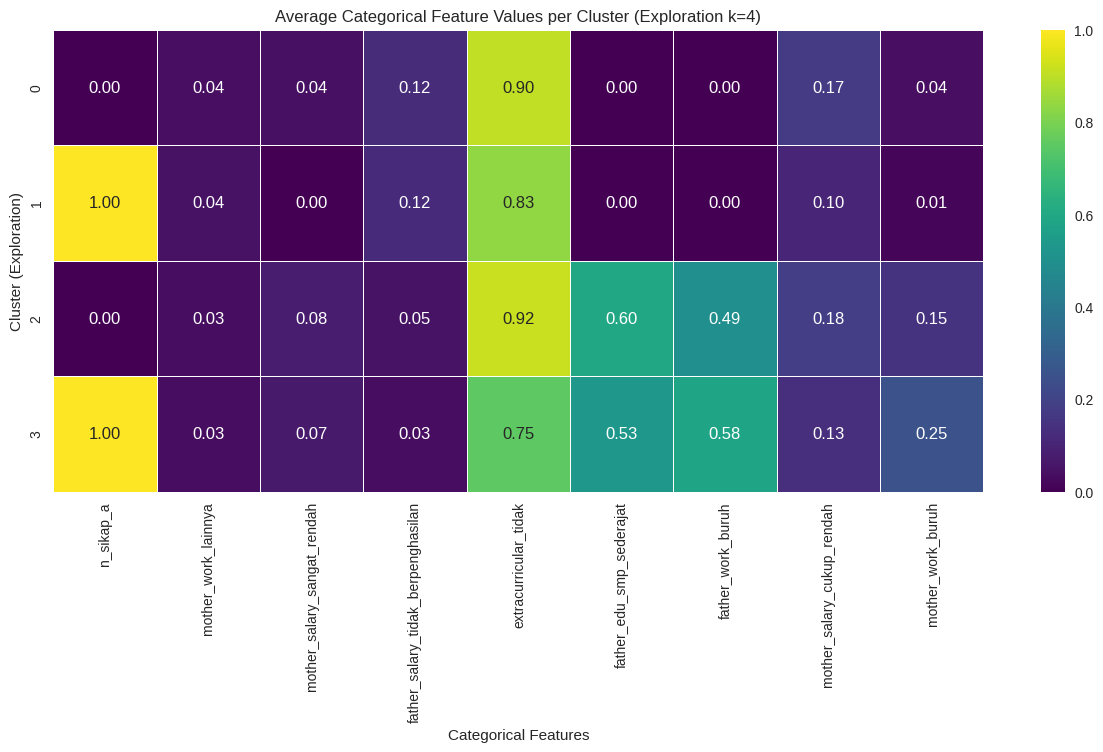

In [ ]:
# Calculate average categorical feature values per cluster (Exploration)
cluster_exp_means_categorical = df_top15_clustered.groupby('cluster_exp')[categorical_cols].mean()

# Visualize average categorical feature values per cluster (Exploration k=4)
plt.figure(figsize=(15, 6))
sns.heatmap(cluster_exp_means_categorical, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Average Categorical Feature Values per Cluster (Exploration k=4)')
plt.xlabel('Categorical Features')
plt.ylabel('Cluster (Exploration)')
plt.show()

### **Interpretasi Klaster (Alur "Pure Clustering Exploration" k=4):**
---

Berdasarkan analisis visualisasi boxplot dan heatmap nilai rata-rata fitur numerik dan kategorikal, K-Means dengan `k=4` pada data `X_pca` berhasil mengidentifikasi empat segmen siswa yang distinct dan bermakna. Silhouette Score yang tinggi (0.6964) juga memvalidasi bahwa klaster-klaster ini memiliki kohesi internal yang kuat dan terpisah dengan baik satu sama lain.

**Klaster 3: "Siswa Unggul Akademik dan Berkarakter Optimal (Elite)"**

* **Ukuran:** Ini adalah klaster terkecil (60 siswa), namun paling menonjol secara karakteristik.
* **Nilai Akademik:** Memiliki **nilai rata-rata tertinggi secara konsisten di hampir semua mata pelajaran**, terutama `n_agama` (92.58), `n_kejuruan` (88.03), `n_mat` (84.97), `n_bjawa` (88.53), dan `n_bindo` (87.53). Ini mengindikasikan kelompok siswa dengan performa akademik yang sangat superior.
* **Sikap (`n_sikap_A`):** Fitur paling membedakan adalah **semua siswa di klaster ini memiliki "sikap A"** (rata-rata 1.00). Ini menunjukkan tingkat kedisiplinan, motivasi, atau karakter positif yang sangat tinggi.
* **Partisipasi Ekstrakurikuler:** Memiliki **proporsi terendah siswa yang tidak mengikuti ekstrakurikuler** (rata-rata `extracurricular_tidak` 0.75), yang berarti klaster ini memiliki tingkat partisipasi ekstrakurikuler tertinggi dibandingkan klaster lainnya.
* **Latar Belakang Sosial Ekonomi:** Klaster ini menunjukkan proporsi yang sedikit lebih tinggi untuk ayah berpendidikan SMP dan bekerja sebagai buruh dibandingkan Klaster 0 dan 1, namun ini tidak mengurangi performa mereka yang luar biasa.
* **Ringkasan:** Klaster 3 mewakili kelompok siswa "elite" yang tidak hanya mencapai keunggulan akademik yang luar biasa di berbagai bidang, tetapi juga menunjukkan karakter dan sikap yang optimal serta partisipasi aktif dalam kegiatan non-akademik, terlepas dari latar belakang sosial ekonomi yang mungkin beragam.

**Klaster 1: "Siswa Berprestasi Tinggi (terutama Agama & Olahraga) dan Berkarakter A"**

* **Ukuran:** Klaster ini memiliki ukuran sedang (162 siswa).
* **Nilai Akademik:** Menunjukkan nilai akademik yang tinggi secara konsisten, **sangat menonjol di `n_agama` (91.68) dan `n_por` (87.90)**, serta tinggi di `n_kejuruan` (88.42), `n_mat` (85.92), dan `n_bindo` (87.60).
* **Sikap (`n_sikap_A`):** Seperti Klaster 3, **semua siswa di klaster ini juga memiliki "sikap A"** (rata-rata 1.00).
* **Partisipasi Ekstrakurikuler:** Memiliki proporsi `extracurricular_tidak` yang lebih rendah (0.83) dibandingkan Klaster 0 dan 2, menunjukkan tingkat partisipasi ekstrakurikuler yang lebih baik.
* **Latar Belakang Sosial Ekonomi:** Tidak ada pola demografi yang dominan.
* **Ringkasan:** Klaster 1 adalah kelompok siswa berprestasi tinggi secara akademik, dengan fokus khusus pada nilai agama dan olahraga. Mereka juga dicirikan oleh sikap yang sangat positif.

**Klaster 0: "Siswa Mayoritas Berprestasi Akademik Menengah dan Pasif"**

* **Ukuran:** Ini adalah klaster terbesar (421 siswa).
* **Nilai Akademik:** Cenderung memiliki **nilai rata-rata yang lebih rendah di semua mata pelajaran** dibandingkan Klaster 1 dan 3, tetapi tidak serendah Klaster 2. Misalnya, `n_agama` (85.38), `n_mat` (82.14).
* **Sikap (`n_sikap_A`):** **Tidak memiliki siswa dengan "sikap A"** (rata-rata 0.00). Ini menunjukkan kelompok yang mayoritas memiliki sikap B, C, atau D.
* **Partisipasi Ekstrakurikuler:** Mayoritas besar siswa di klaster ini **tidak mengikuti kegiatan ekstrakurikuler** (rata-rata `extracurricular_tidak` sangat tinggi, yaitu 0.90).
* **Latar Belakang Sosial Ekonomi:** Merepresentasikan demografi umum siswa, dengan proporsi rendah untuk kategori minoritas pekerjaan/gaji orang tua.
* **Ringkasan:** Klaster 0 adalah kelompok inti atau mayoritas siswa, dengan performa akademik yang moderat, tidak menunjukkan "sikap A", dan cenderung tidak aktif dalam kegiatan ekstrakurikuler.

**Klaster 2: "Siswa Berprestasi Akademik Rendah dan Pasif dengan Latar Belakang Pekerja"**

* **Ukuran:** Klaster ini berukuran sedang (213 siswa).
* **Nilai Akademik:** Cenderung memiliki **nilai rata-rata paling rendah di sebagian besar mata pelajaran**, terutama `n_agama` (85.29) dan `n_mat` (81.98).
* **Sikap (`n_sikap_A`):** Seperti Klaster 0, **tidak memiliki siswa dengan "sikap A"** (rata-rata 0.00).
* **Partisipasi Ekstrakurikuler:** Sebagian besar siswa di klaster ini **tidak mengikuti kegiatan ekstrakurikuler** (rata-rata `extracurricular_tidak` sangat tinggi, yaitu 0.92).
* **Latar Belakang Sosial Ekonomi:** Klaster ini menonjol karena memiliki **proporsi tertinggi untuk ayah berpendidikan SMP (`father_edu_smp_sederajat` = 0.60)** dan **ayah bekerja buruh (`father_work_buruh` = 0.49)**.
* **Ringkasan:** Klaster 2 mewakili kelompok siswa yang paling membutuhkan perhatian dan dukungan, ditandai dengan performa akademik yang cenderung lebih rendah, sikap yang tidak optimal, kurangnya partisipasi ekstrakurikuler, dan kecenderungan latar belakang sosial ekonomi yang lebih rentan.

---

# **7. Export The Result**

In [ ]:
df_top15.to_csv('df_top15.csv', index=False)

In [ ]:
df_top15_clustered.to_csv('clustering_results.csv', index=False)
print("Clustering results exported to 'clustering_results.csv'")

Clustering results exported to 'clustering_results.csv'


In [ ]:
# Export the trained k-means model based on PCA (pure exploration flow)
joblib.dump(kmeans_pca, 'kmeans_pca_model.pkl')
print("K-Means PCA model exported as 'kmeans_pca_model.pkl'")

# Export the trained PCA transformer
joblib.dump(pca, 'pca_transformer.pkl')
print("PCA transformer exported as 'pca_transformer.pkl'")

# Export the fitted scaler
joblib.dump(scaler, 'minmax_scaler.pkl')
print("MinMax Scaler exported as 'minmax_scaler.pkl'")

K-Means PCA model exported as 'kmeans_pca_model.pkl'
PCA transformer exported as 'pca_transformer.pkl'
MinMax Scaler exported as 'minmax_scaler.pkl'


In [ ]:
# Export the first 10 rows of X to a CSV file
X.head(10).to_csv('X_first_10_rows.csv', index=False)
print("First 10 rows of X exported to 'X_first_10_rows.csv'")

First 10 rows of X exported to 'X_first_10_rows.csv'


# **8. Testing Model**
or predict

In [ ]:
from google.colab import files
import io
import pandas as pd # Ensure pandas is imported

def predict_clusters_on_upload(scaler, pca_transformer, kmeans_model):
    """
    Uploads a file, preprocesses it, and predicts clusters using a trained K-Means model.

    Args:
        scaler: The fitted MinMaxScaler object used for training.
        pca_transformer: The fitted PCA object used for training.
        kmeans_model: The trained KMeans model object.
    """
    uploaded = files.upload()

    for fn, data in uploaded.items():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(data)))

        try:
            # Read the uploaded CSV file (assuming CSV based on previous code)
            # Use io.BytesIO to read from the uploaded data
            df_new_data = pd.read_csv(io.BytesIO(data))
            print(f"File '{fn}' read into DataFrame.")

            # Apply the same preprocessing steps as the training data
            # 1. Select the top 15 features (and drop final_score if it exists)
            # Assuming X.columns is available from the training part
            # If not, you would need to define the list of feature columns
            feature_columns = ['n_kejuruan', 'n_mat', 'n_por', 'n_agama', 'n_bjawa', 'n_bindo',
                               'n_sikap_a', 'mother_work_lainnya', 'mother_salary_sangat_rendah',
                               'father_salary_tidak_berpenghasilan', 'extracurricular_tidak',
                               'father_edu_smp_sederajat', 'father_work_buruh',
                               'mother_salary_cukup_rendah', 'mother_work_buruh']


            # Select only the feature columns that are present in the uploaded data
            # This handles cases where the uploaded data might not have all original columns
            present_feature_columns = [col for col in feature_columns if col in df_new_data.columns]

            if not present_feature_columns:
                print(f"Error: None of the expected feature columns found in file '{fn}'.")
                continue # Skip to the next file if no features are found

            X_new_data = df_new_data[present_feature_columns].copy() # Use .copy() to avoid SettingWithCopyWarning

            # 2. Rename columns to match the trained model's expectation
            # We already renamed columns to lowercase and replaced spaces with underscores
            # during the training phase. We need to ensure the uploaded data matches this.
            # Let's re-apply the same renaming logic for robustness.
            new_columns_new_data = {col: col.replace(' ', '_').lower() for col in X_new_data.columns}
            X_new_data.rename(columns=new_columns_new_data, inplace=True)

            # Ensure the columns in X_new_data are in the same order as the training data (X)
            # This is important for consistent scaling and PCA transformation
            # Assuming X is a DataFrame from the training phase
            try:
                 # Ensure X_new_data has the same columns as the training X, in the same order
                 X_new_data = X_new_data[X.columns]
            except KeyError as e:
                 print(f"Error: Column mismatch. The uploaded file is missing expected training column: {e}. Please ensure the column names match the training data after renaming.")
                 continue


            # 3. Scale the new data using the fitted scaler
            X_new_scaled = scaler.transform(X_new_data)

            # 4. Apply PCA using the fitted PCA transformer
            X_new_pca = pca_transformer.transform(X_new_scaled)

            # 5. Predict clusters using the trained k-means model on the PCA data
            new_data_clusters = kmeans_model.predict(X_new_pca)

            # Add the predicted clusters to the new data DataFrame
            df_new_data['predicted_cluster'] = new_data_clusters

            # Display the results
            print(f"\n--- Clustering Results for {fn} ---")
            display(df_new_data.head()) # Use display for better formatting in notebooks
            print("\n...")
            display(df_new_data.tail()) # Display the last few rows as well


            # Optional: Save the results to a new CSV file
            output_filename = "clustering_result.csv"
            df_new_data.to_csv(output_filename, index=False)
            print(f"\nClustering results saved to {output_filename}")

        except FileNotFoundError:
            print(f"Error: Uploaded file '{fn}' not found after upload (internal error).")
        except pd.errors.EmptyDataError:
            print(f"Error: Uploaded file '{fn}' is empty.")
        except Exception as e:
            print(f"An error occurred while processing file {fn}: {e}")

# To use the function, you would call it after loading your trained objects:
# Assuming you have loaded the scaler, pca_transformer, and kmeans_pca model like this:
loaded_scaler = joblib.load('minmax_scaler.pkl')
loaded_pca = joblib.load('pca_transformer.pkl')
loaded_kmeans_pca = joblib.load('kmeans_pca_model.pkl')

# Then call the function:
predict_clusters_on_upload(loaded_scaler, loaded_pca, loaded_kmeans_pca)

Saving X_first_10_rows.csv to X_first_10_rows (1).csv
User uploaded file "X_first_10_rows (1).csv" with length 610 bytes
File 'X_first_10_rows (1).csv' read into DataFrame.

--- Clustering Results for X_first_10_rows (1).csv ---


,n_kejuruan,n_mat,n_por,n_agama,n_bjawa,n_bindo,n_sikap_a,mother_work_lainnya,mother_salary_sangat_rendah,father_salary_tidak_berpenghasilan,extracurricular_tidak,father_edu_smp_sederajat,father_work_buruh,mother_salary_cukup_rendah,mother_work_buruh,predicted_cluster
0,87,85,89,94,89,87,1,0,0,0,1,0,1,0,0,3
1,86,82,84,83,88,87,0,0,0,0,1,1,0,1,0,2
2,88,90,87,94,87,87,1,0,0,1,1,0,0,0,0,1
3,88,85,89,94,89,88,1,0,0,0,0,1,1,0,0,3
4,87,84,85,91,89,87,0,0,0,0,1,0,1,1,1,2



...


,n_kejuruan,n_mat,n_por,n_agama,n_bjawa,n_bindo,n_sikap_a,mother_work_lainnya,mother_salary_sangat_rendah,father_salary_tidak_berpenghasilan,extracurricular_tidak,father_edu_smp_sederajat,father_work_buruh,mother_salary_cukup_rendah,mother_work_buruh,predicted_cluster
5,86,84,83,92,89,83,0,0,0,0,1,0,0,0,0,0
6,86,84,87,94,90,87,0,0,0,0,1,0,0,0,0,0
7,90,86,90,95,90,87,1,0,0,0,1,0,0,0,0,1
8,86,80,85,91,88,86,0,1,0,0,1,0,0,0,0,0
9,87,84,91,95,89,84,1,0,0,1,1,0,0,0,0,1



Clustering results saved to clustering_result.csv
